## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

In [296]:
taxi_data = pd.read_csv("/Users/kakotichi/Documents/GitHub/sf_data_science/Project_DS/Project 5/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [297]:
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'])
print(taxi_data['pickup_datetime'].min())
print(taxi_data['pickup_datetime'].max())

2016-01-01 00:00:17
2016-06-30 23:59:39


### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [298]:
taxi_data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [299]:
print('Уникальных таксопарков: {}'.format(taxi_data['vendor_id'].nunique()))
print('Максимальное количество пассажиров: {}'.format(taxi_data['passenger_count'].max()))
print('Средняя и медиальная длительность поездки: {:.0f} s, {:.0f} s'.format(
    taxi_data['trip_duration'].mean(), taxi_data['trip_duration'].median()))
print('Средняя и медиальная длительность поездки: {:.0f} s, {:.0f} s'.format(
    taxi_data['trip_duration'].min(), taxi_data['trip_duration'].max()))

Уникальных таксопарков: 2
Максимальное количество пассажиров: 9
Средняя и медиальная длительность поездки: 959 s, 662 s
Средняя и медиальная длительность поездки: 1 s, 3526282 s


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [300]:
def add_datetime_features(df):
    # добавляем столбцы с датой, часом и днём недели
    df['pickup_date'] = df['pickup_datetime'].dt.date
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek
    
    return df

taxi_data = add_datetime_features(taxi_data)
# количество поездок, совершенных в субботу
num_trips_on_saturday = len(taxi_data.loc[taxi_data['pickup_day_of_week'] == 5])

print("Количество поездок в субботу:", num_trips_on_saturday)

# количество поездок в день
trips_per_day = taxi_data.groupby('pickup_date').count()['id']

# среднее количество поездок в день
mean_trips_per_day = int(round(trips_per_day.mean()))

print("Среднее количество поездок в день:", mean_trips_per_day)

Количество поездок в субботу: 220868
Среднее количество поездок в день: 8015


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [301]:
holiday_data = pd.read_csv('/Users/kakotichi/Documents/GitHub/sf_data_science/Project_DS/Project 5/holiday_data.csv.xls', sep=';')
holiday_data.head()

,day,date,holiday
0,Friday,2016-01-01,New Years Day
1,Monday,2016-01-18,Martin Luther King Jr. Day
2,Friday,2016-02-12,Lincoln's Birthday
3,Monday,2016-02-15,Presidents' Day
4,Sunday,2016-05-08,Mother's Day


In [302]:
def add_holiday_features(df, holidays_df):
    holidays = list(holidays_df['date'])
    df['pickup_holiday'] = df['pickup_date'].apply(
        lambda x: 1 if str(x) in holidays else 0)
    return df

taxi_data = add_holiday_features(taxi_data, holiday_data)

mask = taxi_data['pickup_holiday'] == 1
print('Медиальная длительность поездки на такси в праздничные дни:',format(
    taxi_data[mask]['trip_duration'].median()))
 

Медиальная длительность поездки на такси в праздничные дни: 585.0


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [303]:
osrm_data = pd.read_csv('/Users/kakotichi/Documents/GitHub/sf_data_science/Project_DS/Project 5/osrm_data_train.csv')
osrm_data.head()

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,1614.9,140.1,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,1393.5,189.4,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."


In [304]:
def add_osrm_features(df, osrm_df):
    #Выбираем из таблицы orsm_df нужные столбцы
    osrm = osrm_df[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]
    #Обьединяем таблицы df и osrm по столбцу id
    df = pd.merge(df, osrm, how='left', on='id')
    return df
taxi_data = add_osrm_features(taxi_data, osrm_data)

# Считаем разницу между медианным значением длительности поездки в исходных данных и в данных, полученных из OSRM
diff = taxi_data['trip_duration'].median() - taxi_data['total_travel_time'].median()
# Выводим результат на экран
print('Разница в длительности: {:.2f} секунд'.format(diff))

# Определяем количество пропущенных значений в столбцах, содержащих информацию из osrm_data
osrm_cols = ['total_distance', 'total_travel_time', 'number_of_steps']
missing_values_count = taxi_data[osrm_cols].isnull().sum()

print('Количество пропущенных значений: \n{}'.format(missing_values_count))

Разница в длительности: 372.50 секунд
Количество пропущенных значений: 
total_distance       1
total_travel_time    1
number_of_steps      1
dtype: int64


In [305]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [306]:
def add_geographical_features(df):
    lat1, lng1 = df['pickup_latitude'], df['pickup_longitude']
    lat2, lng2 = df['dropoff_latitude'], df['dropoff_longitude']
    df['haversine_distance'] = get_haversine_distance(lat1, lng1, lat2, lng2)
    df['direction'] = get_angle_direction(lat1, lng1, lat2, lng2)
    return df


taxi_data = add_geographical_features(taxi_data)
print('Медиальное значение расстояния Хаверсина: {:.2f} км'.format(
    taxi_data['haversine_distance'].median()))

Медиальное значение расстояния Хаверсина: 2.09 км


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [307]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

# ваш код здесь

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [308]:
def add_cluster_features(df, cluster_model):
    X = np.array(df[['pickup_latitude', 'pickup_longitude',
                     'dropoff_latitude', 'dropoff_longitude']])
    df['geo_cluster'] = cluster_model.predict(X)
    return df
# Добавление номера кластера в таблицу taxi_data
taxi_data = add_cluster_features(taxi_data, kmeans)

# Подсчет количества поездок в каждом кластере и вывод минимального количества на экран
cluster_count = taxi_data.groupby('geo_cluster')['id'].count()
print('Минимальное количество поездок в кластере: {}'.format(cluster_count.min()))

Минимальное количество поездок в кластере: 2


### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [309]:
weather_data = pd.read_csv('/Users/kakotichi/Documents/GitHub/sf_data_science/Project_DS/Project 5/weather_data.csv')
weather_data.head()
# ваш код здесь

,time,temperature,windchill,heat index,humidity,pressure,dew Point,visibility,wind dir,wind speed,gust speed,precip,events,conditions,date,hour
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,None,Overcast,2015-12-31,2
1,2015-12-31 03:00:00,7.2,5.9,NaN,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,None,Overcast,2015-12-31,3
2,2015-12-31 04:00:00,7.2,NaN,NaN,0.90,1016.7,5.6,12.9,Calm,0.0,0.0,0.0,None,Overcast,2015-12-31,4
3,2015-12-31 05:00:00,7.2,5.9,NaN,0.86,1015.9,5.0,14.5,NW,7.4,0.0,0.0,None,Overcast,2015-12-31,5
4,2015-12-31 06:00:00,7.2,6.4,NaN,0.90,1016.2,5.6,11.3,West,5.6,0.0,0.0,None,Overcast,2015-12-31,6


In [310]:
# Определение функции для добавления информации о погоде в таблицу
def add_weather_features(df, weather_df):
    # Преобразование столбца 'time' в формат даты и времени
    weather_df['time'] = pd.to_datetime(weather_df['time'])
    # Создание новых столбцов 'date' и 'hour'
    weather_df['date'] = weather_df['time'].dt.date
    weather_df['hour'] = weather_df['time'].dt.hour
    # Выбор нужных столбцов из таблицы weather_df
    cols = ['date', 'hour', 'temperature', 'visibility', 'wind speed', 'precip', 'events']
    # Объединение таблиц df и weather_df по дате и времени начала поездки
    df = pd.merge(df, weather_df[cols], how='left', left_on=['pickup_date', 'pickup_hour'], right_on=['date', 'hour'])
    # Удаление ненужных столбцов
    df.drop(columns=['date', 'hour'], inplace=True)
    return df

taxi_data = add_weather_features(taxi_data, weather_data)

# Подсчет количества поездок, совершенных во время снегопада
mask = taxi_data['events'] == 'Snow'
print('Количество поездок во время снегопада: {}'.format(taxi_data[mask].shape[0]))

# Выбор столбцов с погодными условиями
weather_cols = ['temperature', 'visibility', 'wind speed', 'precip', 'events']
# Вычисление процента пропущенных значений для каждого столбца
missing_percents = taxi_data[weather_cols].isnull().mean() * 100
# Вычисление среднего значения процента пропущенных значений
mean_missing_percent = missing_percents.mean()
# Вывод результата на экран
print("Доля пропущенных значений в столбцах с погодными условиями: {:.2f}%".format(mean_missing_percent))
# Вычисление процента пропущенных значений для каждого столбца, содержащего информацию о погоде
weather_cols = ['temperature', 'visibility', 'wind speed', 'precip', 'events']
display(taxi_data[weather_cols].isnull().mean() * 100)

Количество поездок во время снегопада: 13126
Доля пропущенных значений в столбцах с погодными условиями: 0.82%


temperature    0.824876
visibility     0.824876
wind speed     0.824876
precip         0.824876
events         0.824876
dtype: float64

### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [311]:
def fill_null_weather_data(df):
    # пропущенные значения в погоднях условиях
    df['temperature'] = df['temperature'].fillna(
        df.groupby('pickup_date')['temperature'].transform('median'))
    df['visibility'] = df['visibility'].fillna(
        df.groupby('pickup_date')['visibility'].transform('median'))
    df['wind speed'] = df['wind speed'].fillna(
        df.groupby('pickup_date')['wind speed'].transform('median'))
    df['precip'] = df['precip'].fillna(
        df.groupby('pickup_date')['precip'].transform('median'))
    
    # пропущенные значения ы "events"
    df['events'] = df['events'].fillna('None')
    
    #пропущенные значения в поездках
    df['total_distance'] = df['total_distance'].fillna(
        df['total_distance'].median())
    df['total_travel_time'] = df['total_travel_time'].fillna(
        df['total_travel_time'].median())
    df['number_of_steps'] = df['number_of_steps'].fillna(
        df['number_of_steps'].median())
    
    return df

#пропущенныe значения в таблице taxi_data
taxi_data = fill_null_weather_data(taxi_data)

# Вывод медианного значения температуры
print('Медианная температура: {:.1f}'.format(taxi_data['temperature'].median()))

Медианная температура: 11.1


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


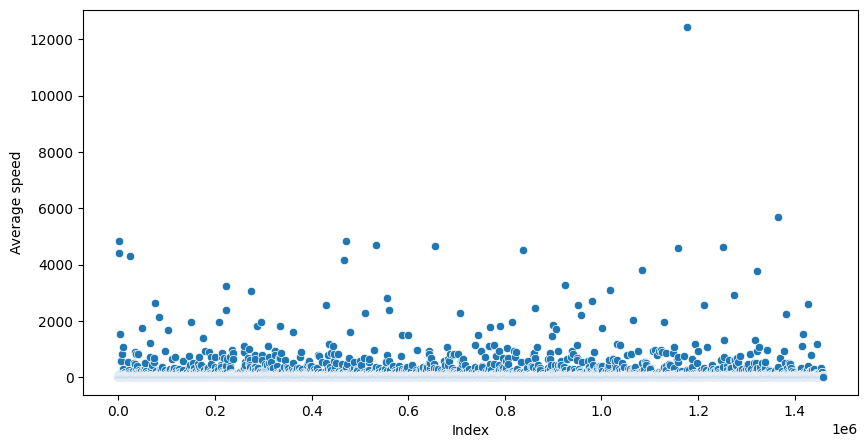

In [312]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [313]:
mask =taxi_data['trip_duration'] > 86400
print('Количество поездок больше 24 часов: {}'.format(taxi_data[mask].shape[0]))
taxi_data = taxi_data[~mask]

mask = (taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6) > 300
print("Количество 'телепортаций': {}".format(taxi_data[mask].shape[0]))
taxi_data = taxi_data[~mask]

Количество поездок больше 24 часов: 4
Количество 'телепортаций': 407


## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [314]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

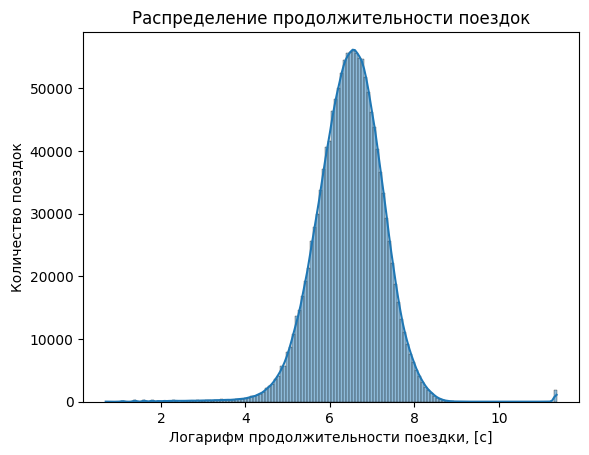

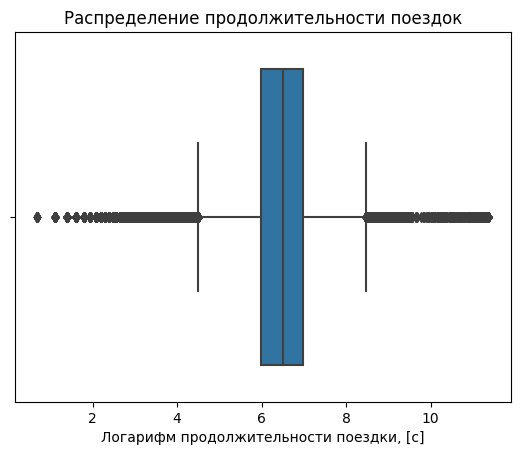

p-value = 0.00


In [271]:
sns.histplot(data=taxi_data, x='trip_duration_log', kde=True, bins=150)
plt.title('Распределение продолжительности поездок')
plt.xlabel('Логарифм продолжительности поездки, [с]')
plt.ylabel('Количество поездок')
plt.show()
sns.boxplot(x=taxi_data['trip_duration_log'])
plt.title('Распределение продолжительности поездок')
plt.xlabel('Логарифм продолжительности поездки, [с]')
plt.show()
# Проверяем нормальность распределения с помощью теста Шапиро-Уилка (p-value должно быть > 0.05)
_, p = stats.normaltest(taxi_data['trip_duration_log'])
print('p-value = {:.2f}'.format(p))

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

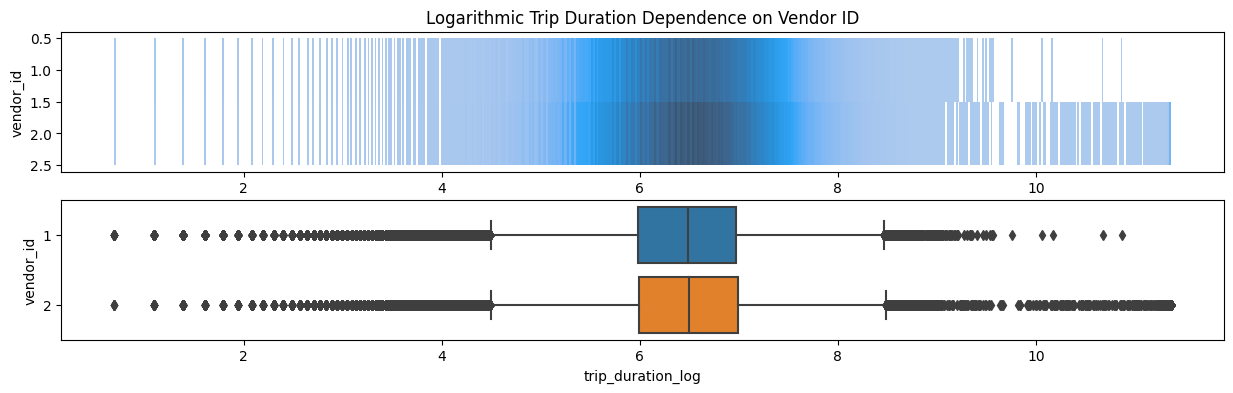

In [315]:
# преобразуем признак vendor_id в категориальный тип данных
taxi_data['vendor_id'] = taxi_data['vendor_id'].astype('category')

# строим гистограмму и коробчатую диаграмму
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 4))
histplot = sns.histplot(
    data = taxi_data,
    x = 'trip_duration_log',
    y = 'vendor_id',
    ax = axes[0]
)
histplot.set_title('Logarithmic Trip Duration Dependence on Vendor ID')
boxplot = sns.boxplot(
    data = taxi_data,
    x = 'trip_duration_log',
    y = 'vendor_id',
    ax = axes[1]
);

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

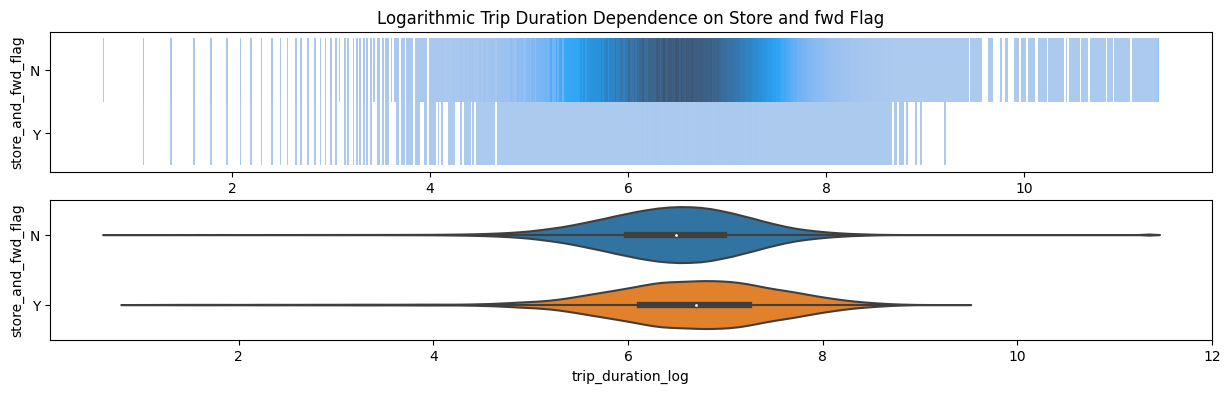

In [273]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 4))

histplot = sns.histplot(
    data = taxi_data,
    x = 'trip_duration_log',
    y = 'store_and_fwd_flag',
    ax = axes[0]
)
histplot.set_title('Logarithmic Trip Duration Dependence on Store and fwd Flag')
violinplot = sns.violinplot(
    data = taxi_data,
    x = 'trip_duration_log',
    y = 'store_and_fwd_flag',
    ax = axes[1]
);

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

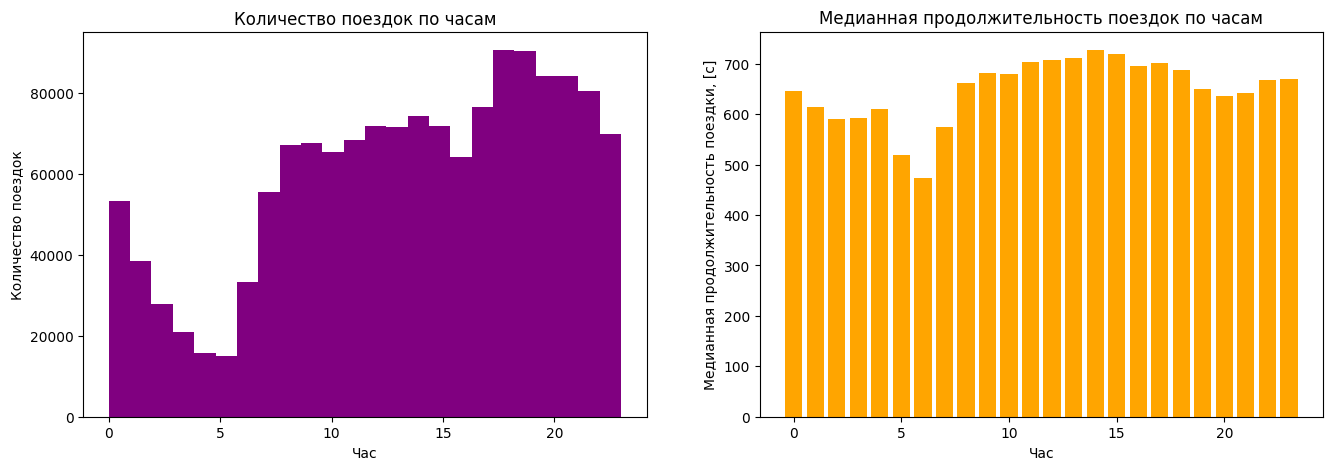

In [274]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

ax1.hist(taxi_data['pickup_hour'], bins=24, color='purple')
ax1.set_title('Количество поездок по часам')
ax1.set_xlabel('Час')
ax1.set_ylabel('Количество поездок')

ax2.bar(taxi_data.groupby('pickup_hour')['trip_duration'].median().index, 
        taxi_data.groupby('pickup_hour')['trip_duration'].median().values, color='orange')
ax2.set_title('Медианная продолжительность поездок по часам')
ax2.set_xlabel('Час')
ax2.set_ylabel('Медианная продолжительность поездки, [с]')

plt.show()

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


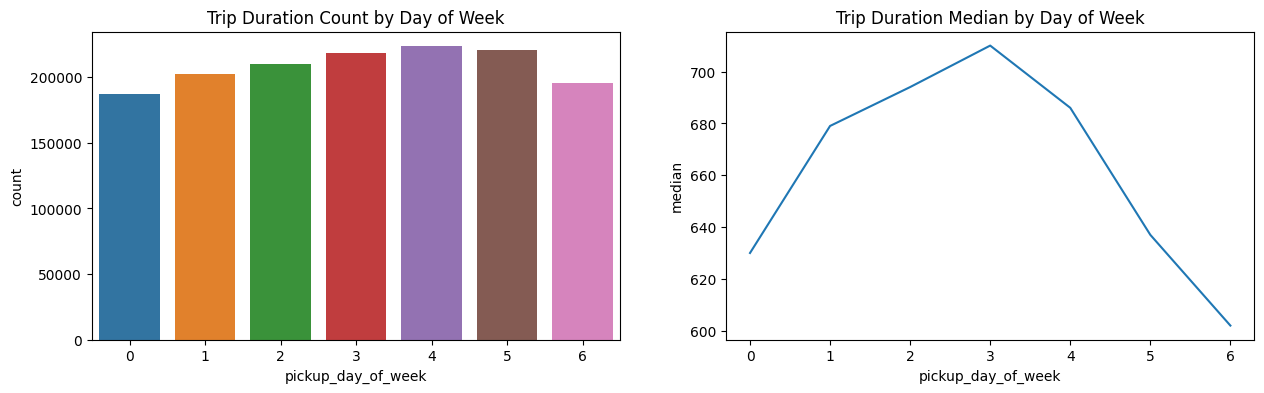

In [275]:
# группируем данные по дню недели и рассчитываем медианную длительность поездок
duration_by_day = taxi_data.groupby('pickup_day_of_week')['trip_duration'].median()

# строим графики
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))
countplot = sns.countplot(data = taxi_data, x = 'pickup_day_of_week', ax = axes[0])
countplot.set_title('Trip Duration Count by Day of Week')
lineplot = sns.lineplot(data = duration_by_day, ax = axes[1])
lineplot.set_title('Trip Duration Median by Day of Week')
lineplot.set_ylabel('median');

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

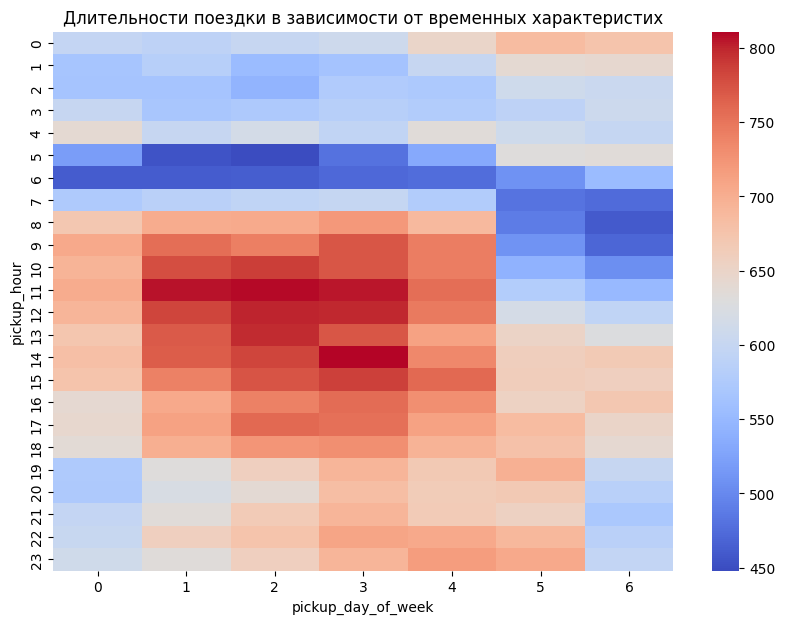

In [150]:
pivot = taxi_data.pivot_table(
    values = 'trip_duration',
    index = 'pickup_hour',
    columns = 'pickup_day_of_week',
    aggfunc = 'median'
)

# визуализируем полученную таблицу
fig = plt.figure(figsize = (10, 7))
heatmap = sns.heatmap(data = pivot, cmap = 'coolwarm')
heatmap.set_title('Длительности поездки в зависимости от временных характеристих');

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


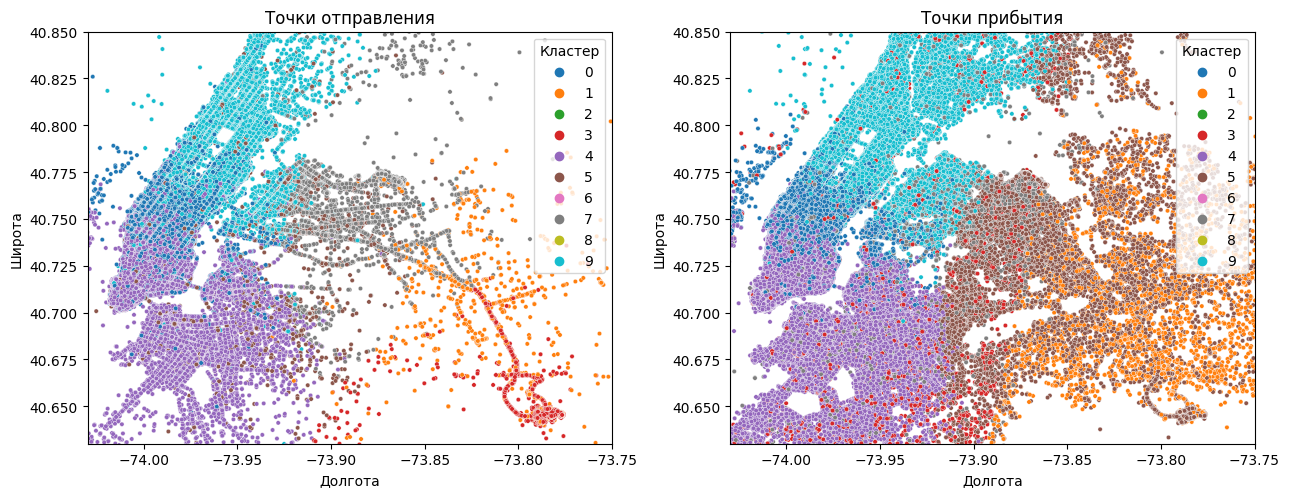

In [151]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

sns.scatterplot(data=taxi_data, x='pickup_longitude', y='pickup_latitude', 
                hue='geo_cluster', palette='tab10', s=10, ax=axes[0])
sns.scatterplot(data=taxi_data, x='dropoff_longitude', y='dropoff_latitude', 
                hue='geo_cluster', palette='tab10', s=10, ax=axes[1])

axes[0].legend(loc='upper right', title='Кластер')
axes[0].set_xlim(city_long_border)
axes[0].set_ylim(city_lat_border)
axes[0].set_aspect('equal')
axes[0].set_title('Точки отправления')
axes[0].set_xlabel('Долгота')
axes[0].set_ylabel('Широта')

axes[1].legend(loc='upper right', title='Кластер')
axes[1].set_xlim(city_long_border)
axes[1].set_ylim(city_lat_border)
axes[1].set_aspect('equal')
axes[1].set_title('Точки прибытия')
axes[1].set_xlabel('Долгота')
axes[1].set_ylabel('Широта')

plt.tight_layout()

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [316]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [317]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [318]:
train_data.drop(columns=['id', 'dropoff_datetime'], inplace=True)
print('Количество столбцов: {}'.format(train_data.shape[1]))

Количество столбцов: 25


Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [319]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [320]:
train_data['vendor_id'] = train_data['vendor_id'].apply(
    lambda x: 0 if x == 1 else 1
).astype('int')

# кодируем признак store_and_fwd_flag
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(
    lambda x: 0 if x == 'N' else 1
)

print(
    'Среднее по столбцу vendor_id:',
    round(train_data['vendor_id'].mean(), 2)
)
print(
    'Среднее по столбцу store_and_fwd_flag:',
    round(train_data['store_and_fwd_flag'].mean(), 3)
)

Среднее по столбцу vendor_id: 0.53
Среднее по столбцу store_and_fwd_flag: 0.006


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [281]:
# не запускать
encoder = preprocessing.OneHotEncoder(drop='first', sparse=False)
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']
encoder.fit(train_data[columns_to_change])
data_onehot = pd.DataFrame(
    encoder.transform(train_data[columns_to_change]),
    columns=encoder.get_feature_names_out(columns_to_change))

print('Количество закодированных столбцов: {}'.format(data_onehot.shape[1]))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Количество закодированных столбцов: 18


In [321]:
# загружаем библиотеку
one_hot_encoder = preprocessing.OneHotEncoder(drop = 'first')

# колонки к преобразованию
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']

# 'учим' кодировщик и сразу кодируем данные
data_onehot = one_hot_encoder.fit_transform(
    train_data[columns_to_change]
).toarray() # результат переводим в массив

# получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()

# составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns = column_names)

print('Количество новых бинарных столбцов:', data_onehot.shape[1])

Количество новых бинарных столбцов: 18


Добавим полученную таблицу с закодированными признаками:

In [322]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [323]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [324]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [325]:
# Создаем экземпляр класса SelectKBest
selector = feature_selection.SelectKBest(
    score_func=feature_selection.f_regression, k=25)

# Применяем SelectKBest к обучающей выборке
selector.fit(X_train, y_train_log)

# Оставляем только выбранные признаки в обучающей и валидационной выборках
X_train = selector.transform(X_train)
X_valid = selector.transform(X_valid)

# Получаем имена выбранных признаков
# Отбрасываем признаки 'trip_duration' и 'trip_duration_log'
feature_names = train_data.columns.drop(['trip_duration', 'trip_duration_log'])
selected_features = selector.get_feature_names_out(feature_names)
print(selected_features)

['vendor_id' 'passenger_count' 'pickup_longitude' 'pickup_latitude'
 'dropoff_longitude' 'dropoff_latitude' 'store_and_fwd_flag' 'pickup_hour'
 'pickup_holiday' 'total_distance' 'total_travel_time' 'number_of_steps'
 'haversine_distance' 'temperature' 'pickup_day_of_week_1'
 'pickup_day_of_week_2' 'pickup_day_of_week_3' 'pickup_day_of_week_4'
 'pickup_day_of_week_5' 'pickup_day_of_week_6' 'geo_cluster_1'
 'geo_cluster_3' 'geo_cluster_5' 'geo_cluster_7' 'geo_cluster_9']


Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [326]:
# Создаем экземпляр класса MinMaxScaler
scaler = preprocessing.MinMaxScaler()

# Применяем MinMaxScaler к обучающей выборке
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Применяем MinMaxScaler к валидационной выборке
X_valid = scaler.transform(X_valid)

# Выводим среднее значение первого признака в валидационной выборке
print('Среднее значение первого признака (валидационная выборка): {:.2f}'.format(
    np.mean(X_valid[:,0])))

Среднее значение первого признака (валидационная выборка): 0.54


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [327]:
# Определяем объект модели линейной регрессии и обучаем ее на обучающей выборке
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train_log)

# Получаем предсказания на обучающей и валидационной выборках
y_pred_train_log = lin_regr.predict(X_train)
y_pred_valid_log = lin_regr.predict(X_valid)

# Рассчитываем метрику RMSLE для обучающей и валидационной выборок
train_rmsle = np.sqrt(metrics.mean_squared_error(y_train_log, y_pred_train_log))
valid_rmsle = np.sqrt(metrics.mean_squared_error(y_valid_log, y_pred_valid_log))

# Выводим результаты
print('RMSLE on the train sample: {:.2f}'.format(train_rmsle))
print('RMSLE on the validation sample: {:.2f}'.format(valid_rmsle))

RMSLE on the train sample: 0.54
RMSLE on the validation sample: 0.54


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [178]:
# создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree = 2, include_bias = False)
poly.fit(X_train)

# генерируем полиномиальные признаки
X_train_poly = poly.transform(X_train)
X_valid_poly = poly.transform(X_valid)

# строим модель полиномиальной регрессии
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_poly, y_train_log)
y_train_pred = lr_poly.predict(X_train_poly)
y_valid_pred = lr_poly.predict(X_valid_poly)

# рассчитываем RMSLE
print(
    'RMSE на тренировочной выборке:',
    round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)), 2)
)
print(
    'RMSE на валидационной выборке:',
    round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)), 2)
)

RMSE на тренировочной выборке: 0.47
RMSE на валидационной выборке: 0.7


### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [179]:
# создаём объект класса линейной регрессии с L2-регуляризацией
lr_ridge = linear_model.Ridge(alpha = 1)

# обучаем модель
lr_ridge.fit(X_train_poly, y_train_log)

# делаем предсказания
y_train_pred = lr_ridge.predict(X_train_poly)
y_valid_pred = lr_ridge.predict(X_valid_poly)

# рассчитываем RMSLE
print(
    'RMSE на тренировочной выборке:',
    round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)), 2)
)
print(
    'RMSE на валидационной выборке:',
    round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)), 2)
)

RMSE на тренировочной выборке: 0.48
RMSE на валидационной выборке: 0.48


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [328]:
# Создаем объект модели дерева
dec_tree = tree.DecisionTreeRegressor(random_state = 42)

# Обучаем модель на обучающей выборке
dec_tree.fit(X_train, y_train_log)

# Получаем прогнозы на обучающей и валидационной выборках
y_pred_train_log = dec_tree.predict(X_train)
y_pred_valid_log = dec_tree.predict(X_valid)

# Рассчитываем метрику RMSLE на обучающей выборке
train_rmsle = np.sqrt(metrics.mean_squared_error(y_train_log, y_pred_train_log))
print('RMSLE on the train sample: {:.2f}'.format(train_rmsle))

# Рассчитываем метрику RMSLE на валидационной выборке
valid_rmsle = np.sqrt(metrics.mean_squared_error(y_valid_log, y_pred_valid_log))
print('RMSLE on the validation sample: {:.2f}'.format(valid_rmsle))

RMSLE on the train sample: 0.00
RMSLE on the validation sample: 0.57


### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


Оптимальная глубина дерева решений: 11
RMSLE на тренировочной выборке: 0.41
RMSLE на валидационной выборке: 0.43


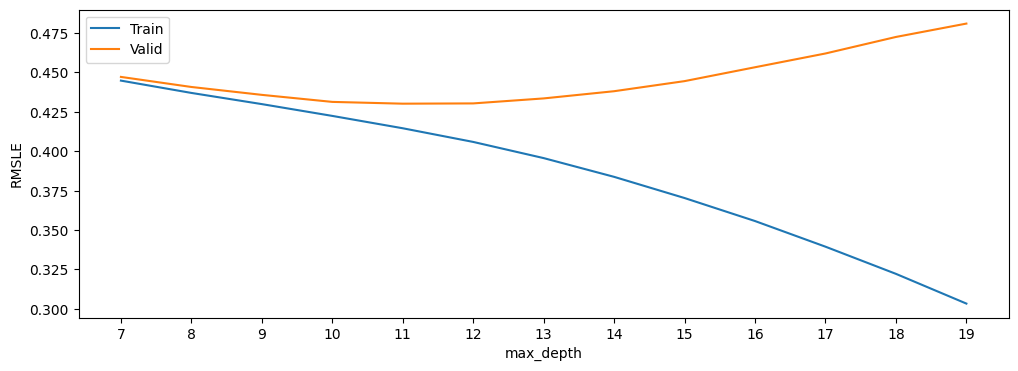

In [289]:
# создаём список из 13 возможных значений от 7 до 20
max_depths = range(7, 20)

# создаём пустые списки, в которые будем добавлять результаты
train_scores = []
valid_scores = []

for depth in max_depths:
    # создаём объект класса DecisionTreeRegressor
    dt_reg = tree.DecisionTreeRegressor(max_depth = depth, random_state = 42)
    # обучаем модель
    dt_reg.fit(X_train, y_train_log)
    # делаем предсказание для тренировочной выборки
    y_train_pred = dt_reg.predict(X_train)
    # делаем предсказание для валидационной выборки
    y_valid_pred = dt_reg.predict(X_valid)
    # рассчитываем RMSLE для двух выборок и добавляем их в списки
    train_scores.append(
        np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred))
    )
    valid_scores.append(
        np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred))
    )

# визуализируем изменения RMSLE в зависимости от max_depth
fig, ax = plt.subplots(figsize = (12, 4))          # фигура + координатная плоскость
ax.plot(max_depths, train_scores, label = 'Train') # линейный график для тренировочной выборки
ax.plot(max_depths, valid_scores, label = 'Valid') # линейный график для валидационной выборки
ax.set_xlabel('max_depth')                         # название оси абсцисс
ax.set_ylabel('RMSLE')                             # название оси ординат
ax.set_xticks(max_depths)                          # метки на оси абсцисс
ax.legend();                                       # отображение легенды

# извлекаем индекс лучшего RMSLE на валидационной выборке
best_index = valid_scores.index(min(valid_scores))
print('Оптимальная глубина дерева решений:', max_depths[best_index])
print('RMSLE на тренировочной выборке:', round(train_scores[best_index], 2))
print('RMSLE на валидационной выборке:', round(valid_scores[best_index], 2))

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [329]:
# создаём объект класса RandomForestRegressor
gf_reg = ensemble.RandomForestRegressor(
    n_estimators = 200,
    max_depth = 12,
    criterion = 'squared_error',
    min_samples_split = 20,
    random_state = 42,
    n_jobs = -1,
    verbose=True
)

# обучаем модель
gf_reg.fit(X_train, y_train_log)

# делаем предсказания
y_train_pred = gf_reg.predict(X_train)
y_valid_pred = gf_reg.predict(X_valid)

# рассчитываем RMSLE
print(
    'RMSLE на тренировочной выборке:',
    round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)), 2)
)
print(
    'RMSLE на валидационной выборке:',
    round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)), 2)
)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  4.3min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    3.2s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    3.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s


RMSLE на тренировочной выборке: 0.4
RMSLE на валидационной выборке: 0.41


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    1.7s finished


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [211]:
# создаём объект класса GradientBoostingRegressor
sr_reg = ensemble.GradientBoostingRegressor(
    learning_rate = 0.5,
    n_estimators = 100,
    max_depth = 6,
    min_samples_split = 30,
    random_state = 42
)

# обучаем модель
sr_reg.fit(X_train, y_train_log)

# делаем предсказания
y_train_pred = sr_reg.predict(X_train)
y_valid_pred = sr_reg.predict(X_valid)

# рассчитываем RMSLE
print(
    'RMSLE на тренировочной выборке:',
    round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)), 2)
)
print(
    'RMSLE на валидационной выборке:',
    round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)), 2)
)

RMSLE на тренировочной выборке: 0.37
RMSLE на валидационной выборке: 0.39


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


Наилучший результат показал Шрадиентный бустинг RMSLE 0.37

### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


Top-3 most important features: Index(['total_distance', 'total_travel_time', 'pickup_hour'], dtype='object')


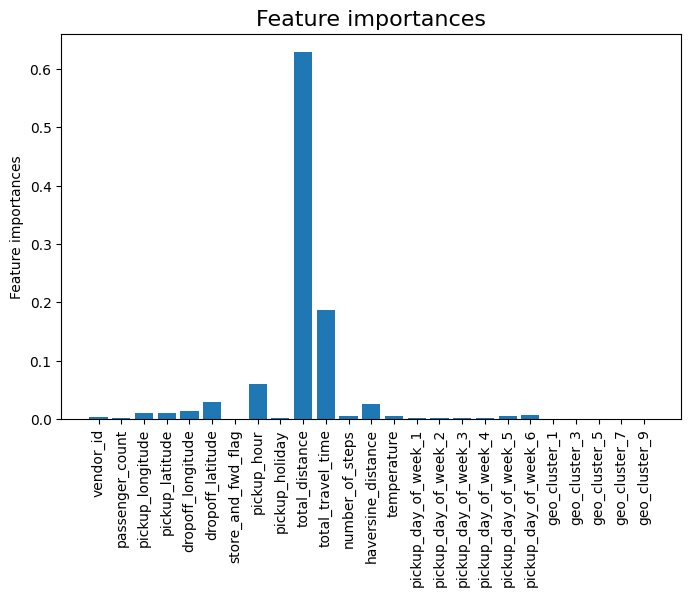

In [330]:
# Создаем объект Series с коэффициентами значимости каждого признака
features = pd.Series(data=sr_reg .feature_importances_, index=selected_features)

# Сортируем признаки по убыванию значимости
features_sorted = features.sort_values(ascending=False)

# Выводим топ-3 наиболее значимых признаков
top3_features = features_sorted.index[:3]
print("Top-3 most important features:", top3_features)

# Строим столбчатую диаграмму
fig, axes = plt.subplots(figsize=(8, 5))
plt.bar(features.index, features.values)
axes.xaxis.set_tick_params(rotation=90)
axes.set_title('Feature importances', fontsize=16)
axes.set_ylabel('Feature importances')
plt.show()

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [331]:
# переводим из логарифимического маштаба в изначальный
y_valid = np.exp(y_valid_log) - 1
y_valid_pred_exp = np.exp(y_valid_pred) - 1

# рассчитываем медианную абсолютную ошибку
meae_valid = metrics.median_absolute_error(y_valid, y_valid_pred_exp)

# переводим значение метрики в минуты и округляем
print('MeAE на валидационной выборке:', round(meae_valid / 60, 1), 'мин')

MeAE на валидационной выборке: 2.0 мин


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [332]:
test_data = pd.read_csv("/Users/kakotichi/Documents/GitHub/sf_data_science/Project_DS/Project 5/Project5_test_data.csv")
osrm_data_test = pd.read_csv("/Users/kakotichi/Documents/GitHub/sf_data_science/Project_DS/Project 5/Project5_osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [ ]:
# Создаем экземпляр класса MinMaxScaler
scaler = preprocessing.MinMaxScaler()

# Применяем MinMaxScaler к обучающей выборке
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Применяем MinMaxScaler к валидационной выборке
X_valid = scaler.transform(X_valid)

# Выводим среднее значение первого признака в валидационной выборке
print('Среднее значение первого признака (валидационная выборка): {:.2f}'.format(
    np.mean(X_valid[:,0])))

In [335]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[selected_features]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

Shape of data: (625134, 25)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [338]:
# делаем предсказание для тестовой выборки
y_test_pred_log = sr_reg.predict(X_test_scaled)

# переводим предсказания из логарифмического маштаба в истинный
y_test_predict = np.exp(y_test_pred_log) - 1

submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('data/submission_gb.csv', index=False)

OSError: Cannot save file into a non-existent directory: 'data'

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [224]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/91/fd/fc99c8a63b4bae794d8c2ec9af17b80de1e4084fa4a0b17fb3d6161b6184/xgboost-1.7.6-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 501.6 kB/s eta 0:00:00a 0:00:01


После чего модуль можно импортировать:

In [228]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [337]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train_log, feature_names=selected_features)
dvalid = xgb.DMatrix(X_valid, label=y_valid_log, feature_names=selected_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=selected_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [339]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

[0]	train-rmse:5.42218	valid-rmse:5.42190
[10]	train-rmse:1.93551	valid-rmse:1.93540
[20]	train-rmse:0.78578	valid-rmse:0.78657
[30]	train-rmse:0.47960	valid-rmse:0.48157
[40]	train-rmse:0.42165	valid-rmse:0.42428
[50]	train-rmse:0.40946	valid-rmse:0.41250
[60]	train-rmse:0.40477	valid-rmse:0.40823
[70]	train-rmse:0.40100	valid-rmse:0.40480
[80]	train-rmse:0.39879	valid-rmse:0.40290
[90]	train-rmse:0.39745	valid-rmse:0.40183
[100]	train-rmse:0.39615	valid-rmse:0.40079
[110]	train-rmse:0.39439	valid-rmse:0.39932
[120]	train-rmse:0.39321	valid-rmse:0.39844
[130]	train-rmse:0.39221	valid-rmse:0.39766
[140]	train-rmse:0.39114	valid-rmse:0.39711
[150]	train-rmse:0.39004	valid-rmse:0.39637
[160]	train-rmse:0.38907	valid-rmse:0.39561
[170]	train-rmse:0.38811	valid-rmse:0.39495
[180]	train-rmse:0.38730	valid-rmse:0.39440
[190]	train-rmse:0.38671	valid-rmse:0.39420
[200]	train-rmse:0.38596	valid-rmse:0.39384
[210]	train-rmse:0.38515	valid-rmse:0.39346
[220]	train-rmse:0.38420	valid-rmse:0.39292

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [340]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.39119


Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

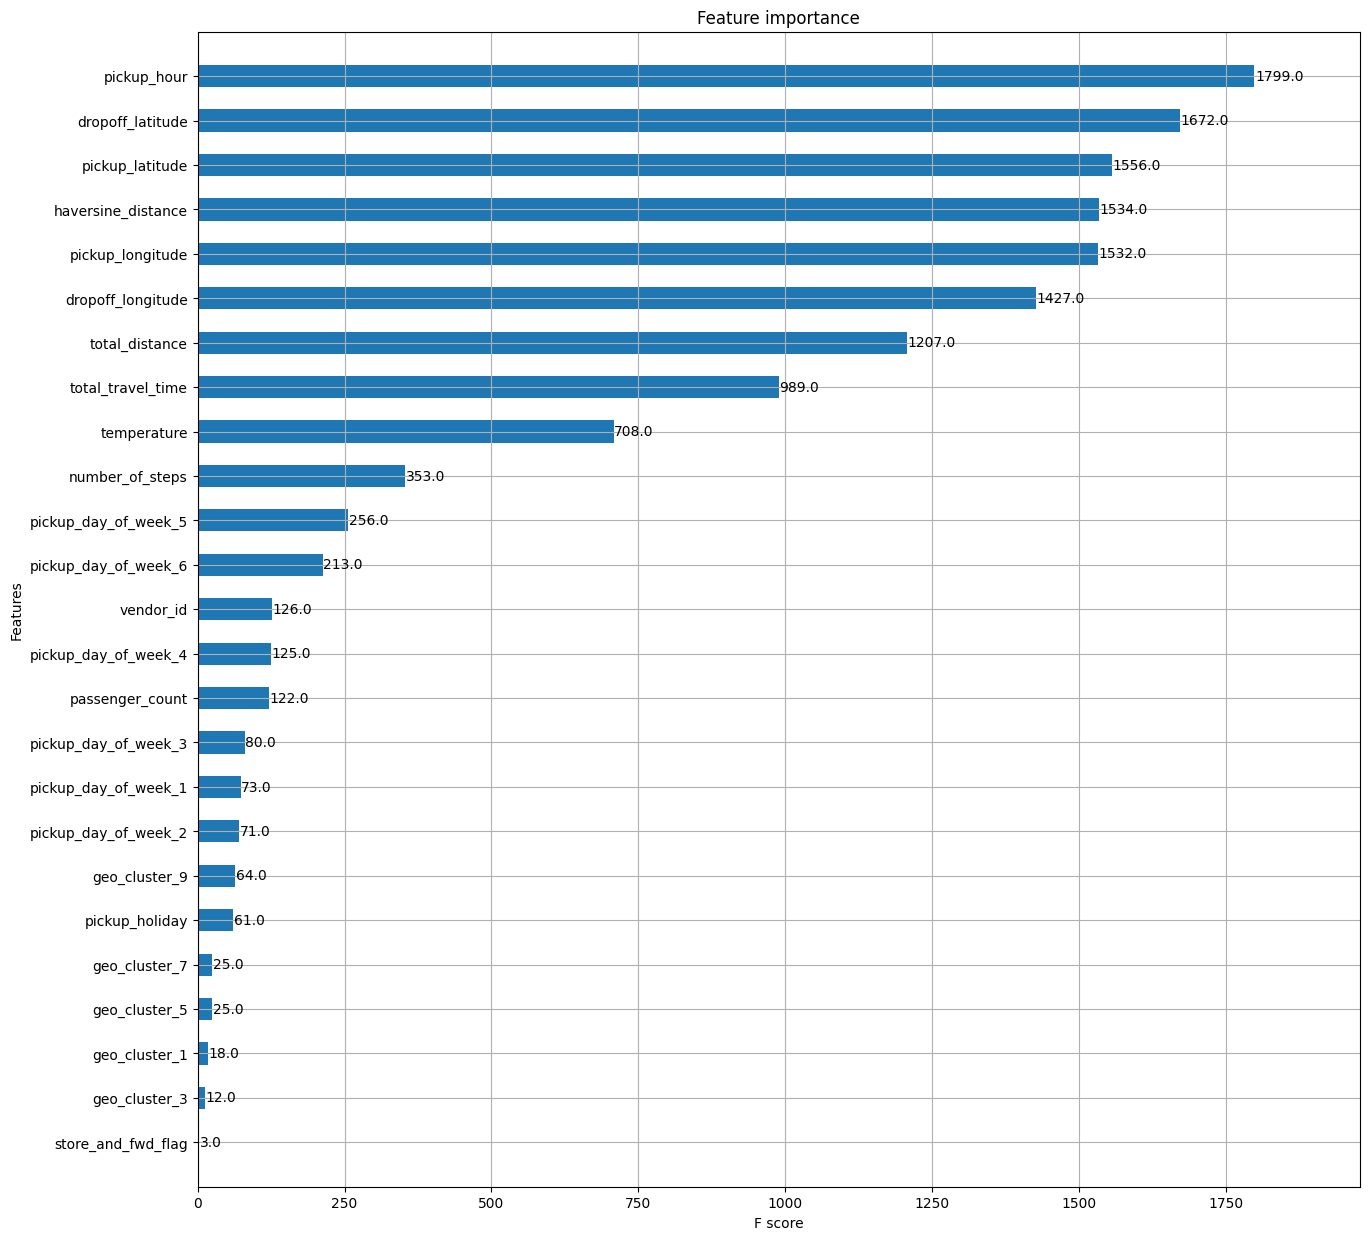

In [341]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)